# Anime Recommendation Engine

## Import Libraries

In [1]:
import numpy as np
import pandas as pd 

from matplotlib import pyplot as plt 
import seaborn as sns

import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_rows = 999

## Import Data

In [2]:
file_dir = '/Users/juan/Desktop/Anime/data/'

In [3]:
ratings_ = pd.read_csv(file_dir + 'rating.csv')

In [4]:
ratings_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
user_id     int64
anime_id    int64
rating      int64
dtypes: int64(3)
memory usage: 178.8 MB


In [5]:
ratings_.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [6]:
ratings_['rating'].replace({-1: np.nan}, inplace = True)
ratings_.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [7]:
ratings_['rating'].min()

1.0

In [8]:
animes_ = pd.read_csv(file_dir + 'anime.csv')

In [9]:
animes_.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [10]:
animes_.head(2).T

,0,1
anime_id,32281,5114
name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood
genre,"Drama, Romance, School, Supernatural","Action, Adventure, Drama, Fantasy, Magic, Mili..."
type,Movie,TV
episodes,1,64
rating,9.37,9.26
members,200630,793665


In [11]:
animes_ = animes_[animes_['type'] == 'TV']

In [12]:
anime_titles_ = animes_[['anime_id', 'name']]

In [13]:
rated_animes_ = ratings_.merge(anime_titles_, left_on='anime_id', right_on='anime_id')[['user_id', 'name', 'rating']]

In [14]:
rated_animes_.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5283596 entries, 0 to 5283595
Data columns (total 3 columns):
user_id    int64
name       object
rating     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.2+ MB


In [15]:
rated_animes_.head()

,user_id,name,rating
0,1,Naruto,NaN
1,3,Naruto,8.0
2,5,Naruto,6.0
3,6,Naruto,NaN
4,10,Naruto,NaN


In [16]:
rated_animes_ = rated_animes_[rated_animes_['user_id'] < 1000]

In [17]:
rated_animes_.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69110 entries, 0 to 5241303
Data columns (total 3 columns):
user_id    69110 non-null int64
name       69110 non-null object
rating     57097 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [18]:
average_ratings = rated_animes_.pivot_table(index='name', values=['rating'], aggfunc=[np.mean, len])

In [19]:
average_ratings.columns = ['mean_rating', 'n_ratings']

In [20]:
average_ratings[average_ratings['n_ratings'] > 100].sort_values(by='mean_rating', ascending=False).head(10)

,mean_rating,n_ratings
Hunter x Hunter (2011),9.398230,123.0
Steins;Gate,9.387900,311.0
Fullmetal Alchemist: Brotherhood,9.304734,377.0
Clannad: After Story,9.210970,262.0
Code Geass: Hangyaku no Lelouch R2,9.127586,321.0
Great Teacher Onizuka,9.000000,112.0
Monogatari Series: Second Season,8.968750,114.0
One Punch Man,8.960000,186.0
Tengen Toppa Gurren Lagann,8.938144,224.0
Code Geass: Hangyaku no Lelouch,8.923567,348.0


In [21]:
average_ratings.sort_values(by='n_ratings', ascending=False).head()

,mean_rating,n_ratings
Sword Art Online,8.205821,541.0
Death Note,8.778706,540.0
Shingeki no Kyojin,8.908676,512.0
Angel Beats!,8.481579,441.0
Mirai Nikki (TV),8.463068,399.0


In [22]:
ratings_pivot_ = rated_animes_.pivot_table(index=['user_id'], columns=['name'], values='rating')

In [23]:
ratings_pivot_.head(10)

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ratings_pivot_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 1 to 999
Columns: 1995 entries, .hack//Roots to xxxHOLiC Kei
dtypes: float64(1995)
memory usage: 14.2 MB


In [25]:
ratings_pivot = ratings_pivot_.fillna(0)

In [26]:
ratings_pivot.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 1 to 999
Columns: 1995 entries, .hack//Roots to xxxHOLiC Kei
dtypes: float64(1995)
memory usage: 14.2 MB


In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(ratings_pivot)
pca_samples = pca.transform(ratings_pivot)

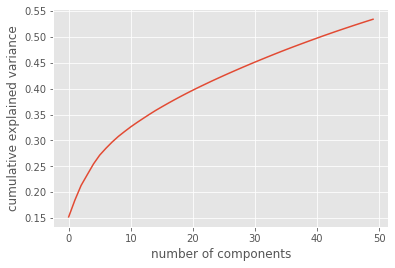

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [60]:
pca.explained_variance_ratio_

array([0.1523622 , 0.03236492, 0.02839413, 0.02091412, 0.02070523,
       0.01702486, 0.01318653, 0.01208315, 0.01080043, 0.00945742,
       0.00907956, 0.00835054, 0.00793999, 0.00784169, 0.00751191,
       0.00698352, 0.00682573, 0.00662122, 0.00645377, 0.00625073,
       0.00609525, 0.00589557, 0.00573466, 0.00571078, 0.00549966,
       0.00545882, 0.00533483, 0.00523965, 0.00521002, 0.0050799 ,
       0.00505395, 0.00493911, 0.00491599, 0.00481999, 0.00476374,
       0.00468467, 0.00456696, 0.00449203, 0.00444359, 0.00439279,
       0.00437149, 0.00433146, 0.00419022, 0.00416993, 0.00407115,
       0.00402411, 0.00400227, 0.00390007, 0.00386663, 0.00379544])

In [70]:
pca_df = pd.DataFrame(pca_samples[:,0:3])
pca_df.head(20)

,0,1,2
0,-17.058239,7.607901,0.017011
1,-19.842764,5.014220,3.211696
2,3.630479,-9.191061,11.445311
3,21.556287,-1.415009,6.130979
4,36.101092,24.004839,9.149241
5,-13.959778,7.766954,-1.313363
6,-20.152063,6.081981,2.892566
7,-18.184852,4.858718,2.650289
8,-7.654263,-8.197356,2.966649
9,-11.817280,-5.208047,-3.824421


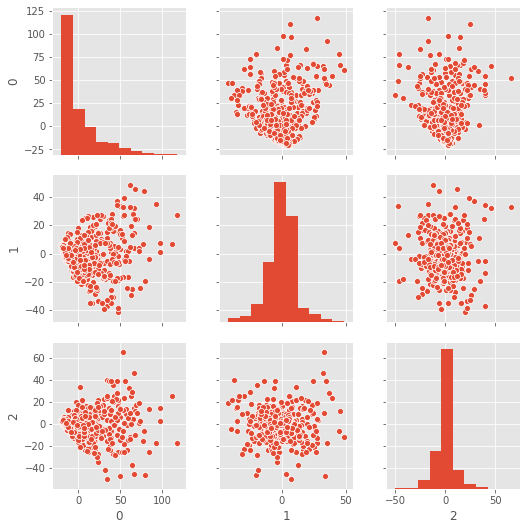

In [73]:
sns.pairplot(pca_df)

In [75]:
print(pca.explained_variance_ratio_)

[0.1523622  0.03236492 0.02839413 0.02091412 0.02070523 0.01702486
 0.01318653 0.01208315 0.01080043 0.00945742 0.00907956 0.00835054
 0.00793999 0.00784169 0.00751191 0.00698352 0.00682573 0.00662122
 0.00645377 0.00625073 0.00609525 0.00589557 0.00573466 0.00571078
 0.00549966 0.00545882 0.00533483 0.00523965 0.00521002 0.0050799
 0.00505395 0.00493911 0.00491599 0.00481999 0.00476374 0.00468467
 0.00456696 0.00449203 0.00444359 0.00439279 0.00437149 0.00433146
 0.00419022 0.00416993 0.00407115 0.00402411 0.00400227 0.00390007
 0.00386663 0.00379544]


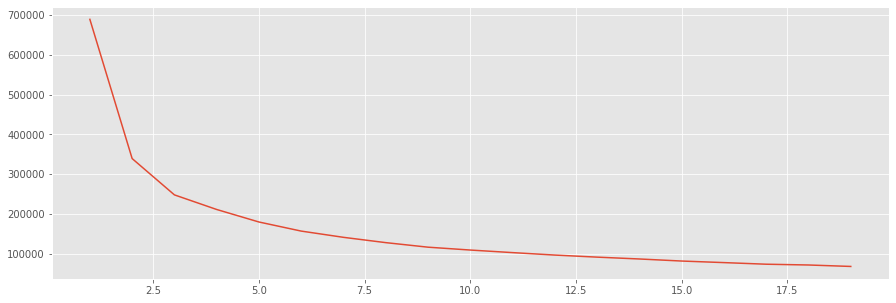

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

sse = {}

for k in range(1,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(15,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(pca_df)
pca_df['label'] = kmeans.labels_

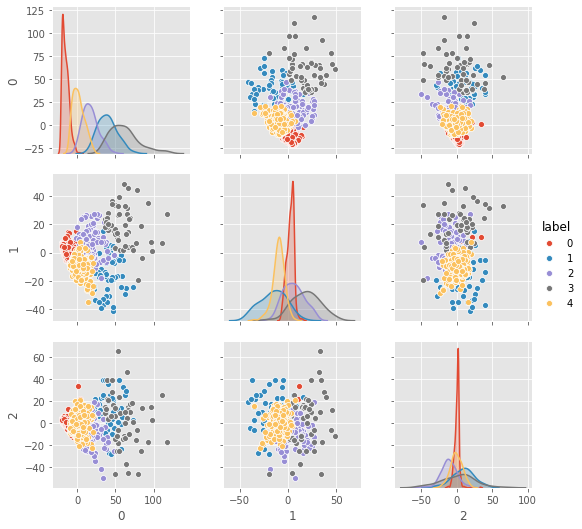

In [78]:
sns.pairplot(pca_df, vars=[0,1,2], hue='label')

In [79]:
ratings_pivot_['label'] = pca_df['label']

In [80]:
ratings_pivot_.head()

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,label
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [81]:
cluster_0 = ratings_pivot_[ratings_pivot_['label'] == 0].drop('label', axis=1)

In [82]:
cluster_0.mean().sort_values(ascending=False).head(10)

name
Chou Denji Machine Voltes V                   10.0
Tobe! Isami                                   10.0
Kinnikuman                                    10.0
Uchuu no Stellvia                             10.0
Bosco Daibouken                               10.0
Chibi Maruko-chan                             10.0
Chibi☆Devi!                                   10.0
Pretty Rhythm: Rainbow Live                   10.0
The iDOLM@STER Cinderella Girls 2nd Season    10.0
Plawres Sanshirou                             10.0
dtype: float64

In [37]:
# Normalize the values
ratings_pivot_normalized = ratings_pivot.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)


# Drop all columns containing only zeros representing users who did not rate
ratings_pivot_normalized.fillna(0, inplace=True)
ratings_pivot_normalized = ratings_pivot_normalized.T
ratings_pivot_normalized = ratings_pivot_normalized.loc[:, (ratings_pivot_normalized != 0).any(axis=0)]

In [38]:
ratings_pivot_normalized.head(10)

user_id,1,2,3,5,7,8,9,10,11,12,...,990,991,992,993,994,995,996,997,998,999
name,,,,,,,,,,,,,,,,,,,,,
.hack//Roots,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405
.hack//Sign,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405
.hack//Tasogare no Udewa Densetsu,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405
009-1,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405
07-Ghost,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405
11eyes,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405
12-sai.: Chicchana Mune no Tokimeki,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405
3 Choume no Tama: Uchi no Tama Shirimasenka?,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405
30-sai no Hoken Taiiku,-0.002005,-0.000501,-0.025865,-0.06812,-0.085013,-0.005013,-0.000501,-0.001404,-0.021955,-0.008471,...,-0.002857,-0.013684,-0.019449,-0.066566,-0.012732,-0.070476,-0.090677,-0.016541,-0.002957,-0.006405


In [39]:
sparse_ratings = sp.sparse.csr_matrix(ratings_pivot_normalized.values)

In [40]:
sparse_ratings

<1995x933 sparse matrix of type '<class 'numpy.float64'>'
	with 1861335 stored elements in Compressed Sparse Row format>

In [41]:
item_similarity = cosine_similarity(sparse_ratings)
user_similarity = cosine_similarity(sparse_ratings.T)

In [42]:
item_sim_df = pd.DataFrame(item_similarity, index = ratings_pivot_normalized.index, columns = ratings_pivot_normalized.index)
user_sim_df = pd.DataFrame(user_similarity, index = ratings_pivot_normalized.columns, columns = ratings_pivot_normalized.columns)

In [43]:
item_sim_df.head()

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
name,,,,,,,,,,,,,,,,,,,,,
.hack//Roots,1.000000,0.393289,0.407331,0.143708,0.144977,-0.008481,0.115465,0.125408,0.084624,0.033032,...,0.081445,0.042026,0.097667,0.074802,0.141838,0.141838,0.097642,0.160208,0.054076,0.062971
.hack//Sign,0.393289,1.000000,0.415672,0.028297,0.161212,-0.034028,0.018650,0.023408,0.015918,-0.006806,...,0.013127,0.064829,0.069263,0.013493,0.026629,0.026629,0.003982,0.141035,0.018892,0.015477
.hack//Tasogare no Udewa Densetsu,0.407331,0.415672,1.000000,0.217374,0.003662,-0.059894,0.178395,0.190872,0.057054,0.015647,...,0.228499,0.123755,0.076334,0.005906,0.215737,0.215737,0.161652,-0.023962,0.094033,0.126924
009-1,0.143708,0.028297,0.217374,1.000000,-0.123764,-0.161618,0.656937,0.691785,0.294279,-0.014416,...,0.217895,0.044622,-0.128177,-0.224566,0.781350,0.781350,0.636809,0.119882,-0.075499,-0.007109
07-Ghost,0.144977,0.161212,0.003662,-0.123764,1.000000,0.192557,-0.111265,-0.024484,-0.023321,0.136125,...,-0.102386,0.130493,0.082201,0.057154,-0.125917,-0.125917,-0.050032,0.021067,0.073885,0.075287


In [44]:
user_sim_df.head()

user_id,1,2,3,5,7,8,9,10,11,12,...,990,991,992,993,994,995,996,997,998,999
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.001004,0.110399,0.020097,0.086875,0.150620,-0.001004,0.276762,0.063271,0.188669,...,-0.002458,0.068954,-0.006999,0.159307,0.048958,0.025844,0.087511,0.023125,-0.002650,0.096341
2,-0.001004,1.000000,0.153899,-0.008354,-0.007936,-0.001715,-0.000502,-0.000868,-0.003898,-0.002179,...,-0.001228,0.167928,-0.003497,-0.006357,-0.002774,0.082696,0.073062,-0.003269,-0.001324,-0.001924
3,0.110399,0.153899,1.000000,0.187344,0.148922,0.072995,-0.004086,0.231199,0.051786,0.206010,...,-0.010008,0.217306,-0.005779,0.119663,0.063408,0.242163,0.178203,0.122850,0.057073,0.294706
5,0.020097,-0.008354,0.187344,1.000000,0.187484,0.031815,0.028435,-0.007636,-0.002038,0.062374,...,-0.020459,0.110470,0.077508,0.161458,0.045658,0.295969,0.209645,0.086286,0.039400,0.064897
7,0.086875,-0.007936,0.148922,0.187484,1.000000,0.031274,0.066741,0.058966,0.150021,0.094378,...,0.012651,0.097418,-0.014905,0.267842,0.043922,0.054293,0.313501,0.146678,-0.020949,0.053938


In [45]:
# This function will return the top 10 shows with the highest cosine similarity value

def top_animes(name):
    count = 1
    print('Similar shows to {} include:\n'.format(name))
    for item in item_sim_df.sort_values(by = name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count +=1  

In [46]:
# This function will return the top 10 users with the highest similarity value 

def top_users(user):
    
    if user not in ratings_pivot_normalized.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 

In [47]:
top_animes('Cowboy Bebop')

Similar shows to Cowboy Bebop include:

No. 1: Samurai Champloo
No. 2: Neon Genesis Evangelion
No. 3: Trigun
No. 4: Black Lagoon
No. 5: Steins;Gate
No. 6: Fullmetal Alchemist: Brotherhood
No. 7: Baccano!
No. 8: Tengen Toppa Gurren Lagann
No. 9: Elfen Lied
No. 10: Fullmetal Alchemist


In [48]:
top_animes('Ghost in the Shell: Stand Alone Complex')

Similar shows to Ghost in the Shell: Stand Alone Complex include:

No. 1: Ghost in the Shell: Stand Alone Complex 2nd GIG
No. 2: Cowboy Bebop
No. 3: Black Lagoon: The Second Barrage
No. 4: Black Lagoon
No. 5: Ergo Proxy
No. 6: Mobile Suit Gundam 00
No. 7: Samurai Champloo
No. 8: Maria†Holic Alive
No. 9: Eureka Seven
No. 10: Space☆Dandy


In [49]:
top_users(3)

Most Similar Users:

User #376, Similarity value: 0.43
User #788, Similarity value: 0.42
User #325, Similarity value: 0.41
User #911, Similarity value: 0.41
User #345, Similarity value: 0.39
User #570, Similarity value: 0.39
User #427, Similarity value: 0.38
User #668, Similarity value: 0.38
User #980, Similarity value: 0.38
User #561, Similarity value: 0.37


In [50]:
ratings_[ratings_['user_id'] == 3]

,user_id,anime_id,rating
156,3,20,8.0
157,3,154,6.0
158,3,170,9.0
159,3,199,10.0
160,3,225,9.0
161,3,341,6.0
162,3,430,7.0
163,3,527,7.0
164,3,552,7.0
165,3,813,10.0


In [51]:
ratings_[ratings_['user_id'] == 156]

,user_id,anime_id,rating
12163,156,527,7.0
12164,156,2167,9.0
12165,156,2251,8.0
12166,156,3901,8.0
12167,156,4059,NaN
12168,156,4181,9.0
12169,156,5081,8.0
12170,156,5630,8.0
12171,156,6347,9.0
12172,156,6351,8.0


In [84]:
from surprise import Reader, Dataset, SVD, SlopeOne, NMF, accuracy
from surprise.model_selection import train_test_split, cross_validate
from surprise.accuracy import rmse

In [98]:
ratings_ = pd.read_csv(file_dir + 'rating.csv')

In [99]:
sample_ratings = ratings_[ratings_['user_id'] < 1000] 

In [100]:
min_anime_ratings = 250
filter_anime = sample_ratings['anime_id'].value_counts() > min_anime_ratings
filter_anime = filter_anime[filter_anime].index.tolist()

min_user_ratings = 250
filter_users = sample_ratings['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = sample_ratings[(sample_ratings['anime_id'].isin(filter_anime)) & (sample_ratings['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(ratings_.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(7813737, 3)
The new data frame shape:	(2036, 3)


In [101]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df_new[['user_id', 'anime_id', 'rating']], reader)

In [102]:
benchmark = []
for algorithm in [SVD(biased=False), SlopeOne(), NMF()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

In [103]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 1.7457


1.7457407626552643

In [105]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SlopeOne,1.793827,0.001922,0.006083
SVD,1.827164,0.096360,0.002120
NMF,2.327236,0.080440,0.002301


In [107]:
data_pred = []
for row in df_new[df_new['rating'] == -1].itertuples():
    tmp_pred = algo.predict(row[1], row[2])
    data_pred.append((tmp_pred[0], tmp_pred[1], round(tmp_pred[3], 2)))
data_pred = pd.DataFrame(data_pred, columns=['user_id', 'anime_id', 'rating'])

In [110]:
data_pred.head()

,user_id,anime_id,rating
0,54,20,0.00
1,54,121,0.00
2,54,199,0.00
3,54,1535,0.00
4,54,1575,0.11
